# 1. DBSCAN

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time

from scipy.io import arff
from sklearn import cluster
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
%run "Utils.ipynb"
##################################################################
# Exemple : DBSCAN Clustering


path = './artificial/'


In [24]:
def standardisation_données(datanp):
    scaler = preprocessing.StandardScaler().fit(datanp)
    data_scaled = scaler.transform(datanp)
    print("Affichage données standardisées  ")
    f0_scaled = data_scaled[:,0] # tous les élements de la première colonne
    f1_scaled = data_scaled[:,1] # tous les éléments de la deuxième colonne

    #plt.figure(figsize=(10, 10))
    plt.scatter(f0_scaled, f1_scaled, s=8)
    plt.title("Donnees standardisées")
    plt.show()

## Test des différentes valeurs des paramètres de DBSCAN

### Test avec données non standardisées

#### Variation de epsilon

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


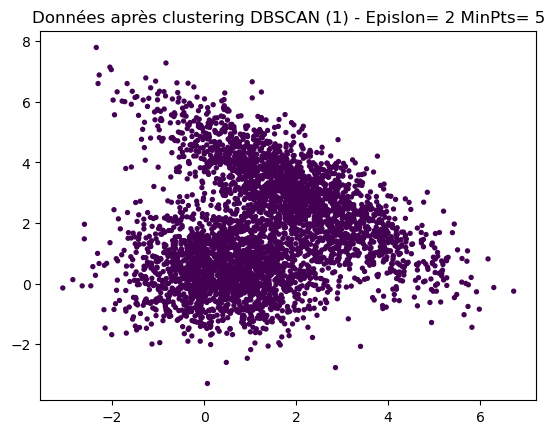

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


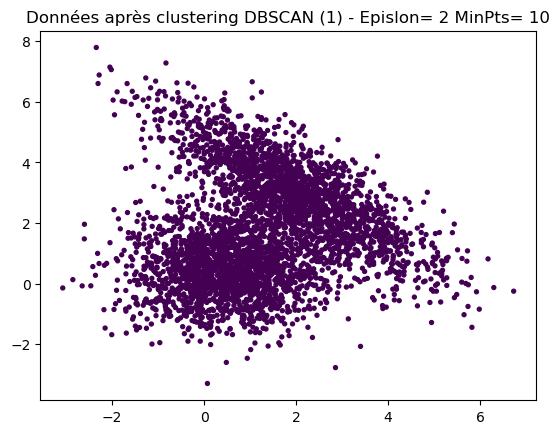

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


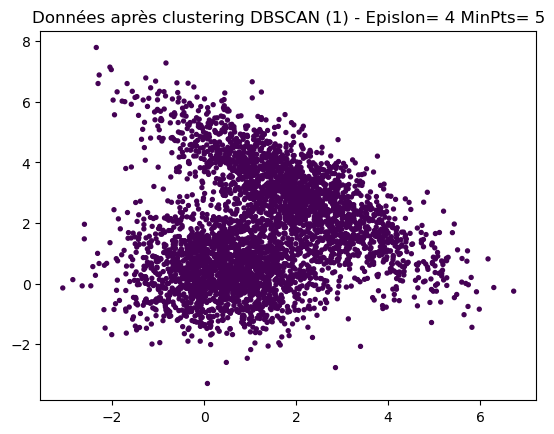

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


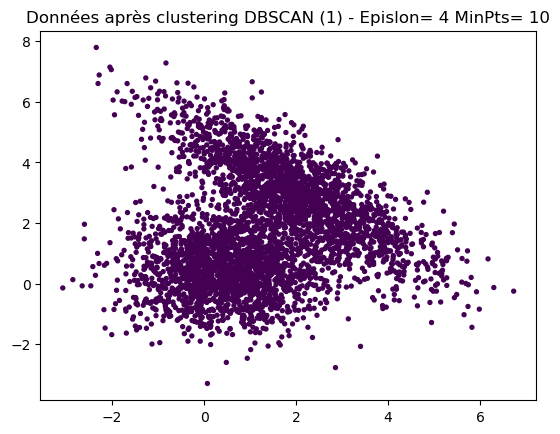

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


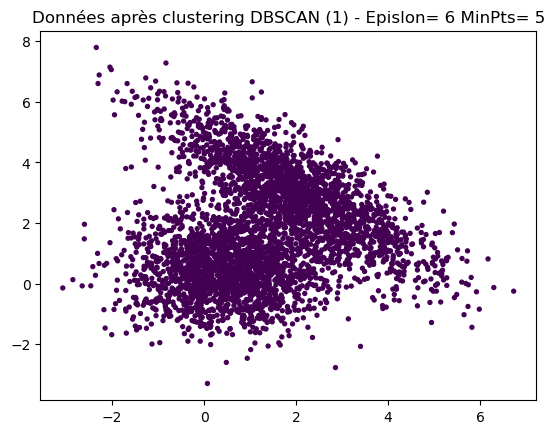

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


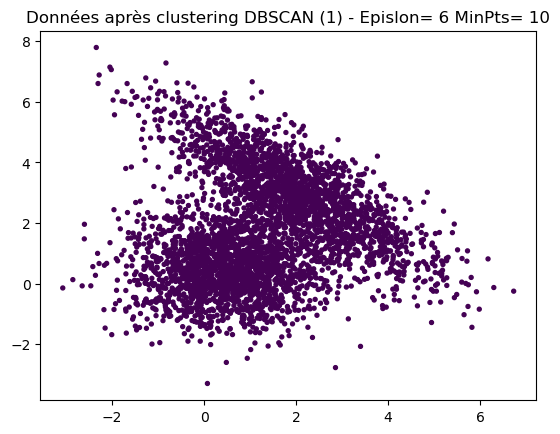

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


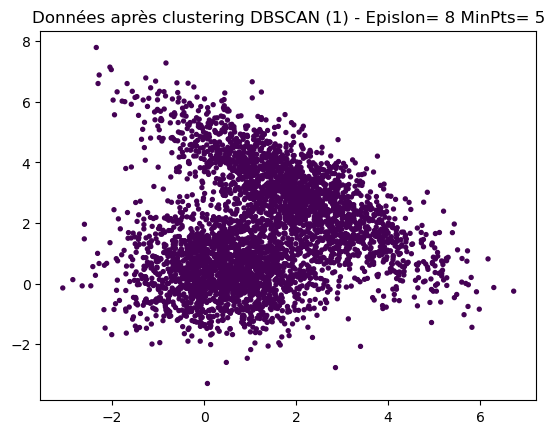

------------------------------------------------------
Number of clusters: 1
Number of noise points: 0


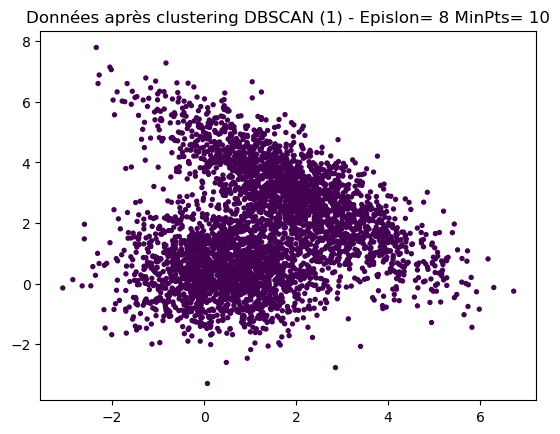

In [25]:
datanp = get_data(path,name)
epsilon_value = np.arange(2,10,2)
min_pts = np.arange(5,15,5)
for i in epsilon_value:
    for j in min_pts:
        
        print("------------------------------------------------------")
        model = cluster.DBSCAN(eps=i, min_samples=j)
        model.fit(datanp)
        labels = model.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        print('Number of clusters: %d' % n_clusters)
        print('Number of noise points: %d' % n_noise)

        plt.scatter(f0, f1, c=labels, s=8)
        plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(i)+" MinPts= "+str(j))
        plt.show()

##  4.2 Application de la méthode DBSCAN

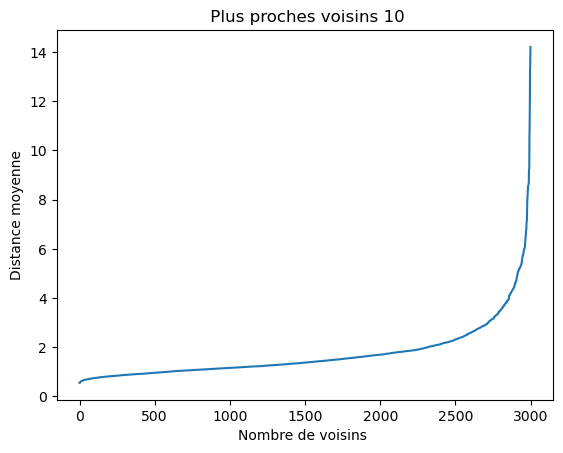

In [26]:
name= "xclara.arff"
# Distances aux k plus proches voisins
datanp = get_data(path,name)
k=10
neigh = NearestNeighbors( n_neighbors = k )
neigh.fit( datanp )
distances , indices = neigh.kneighbors( datanp )
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average( distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort( newDistances )
plt.title(" Plus proches voisins "+str( k ) )
plt.xlabel('Nombre de voisins ')
plt.ylabel('Distance moyenne')
plt.plot( distancetrie ) ;
plt.show()

------------------------------------------------------
Number of clusters: 3
Number of noise points: 230


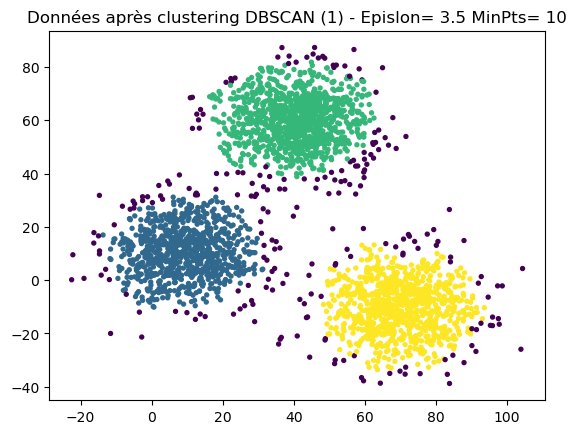

In [27]:
name= "xclara.arff"
datanp = get_data(path,name)
epsilon_value = 3.5
min_pts = 10
        
print("------------------------------------------------------")
model = cluster.DBSCAN(eps=epsilon_value, min_samples=min_pts)
model.fit(datanp)
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)

f0 = datanp[:,0]
f1 = datanp[:,1]

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon_value)+" MinPts= "+str(min_pts))
plt.show()

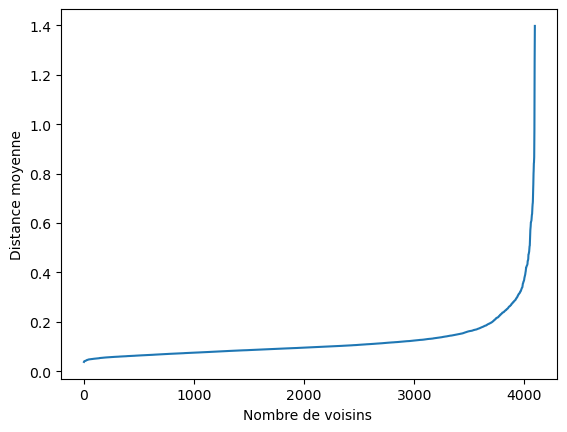

In [28]:
name="engytime.arff"
# Distances aux k plus proches voisins
datanp = get_data(path,name)
k=10
neigh = NearestNeighbors( n_neighbors = k )
neigh.fit( datanp )
distances , indices = neigh.kneighbors( datanp )
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average( distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort( newDistances )
plt.xlabel('Nombre de voisins ')
plt.ylabel('Distance moyenne')
plt.plot( distancetrie ) ;
plt.show()

## 4.3 Intérêts et Limites de la méthode DBSCAN

### Jeu de données pour lesquels vous pensez que DBSCAN devrait identifier correctement les clusters

------------------------------------------------------
Appel DBSCAN (1) ... 
Number of clusters: 4
Number of noise points: 0


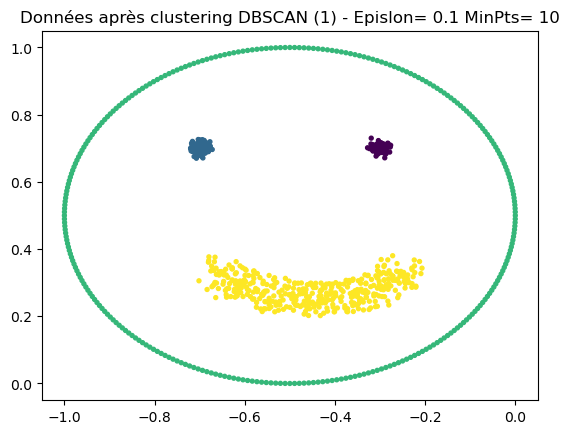

In [29]:
name = "smile2.arff"
datanp = get_data(path, name)
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1]

print("------------------------------------------------------")
print("Appel DBSCAN (1) ... ")
tps1 = time.time()
epsilon=0.1 
min_pts= 10
model = cluster.DBSCAN(eps=epsilon, min_samples=min_pts)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon)+" MinPts= "+str(min_pts))
plt.show()


###  Jeu de données pour lesquels vous pensez que DBSCAN devrait avoir des difficultés.


------------------------------------------------------
Appel DBSCAN (1) ... 
Number of clusters: 100
Number of noise points: 3894


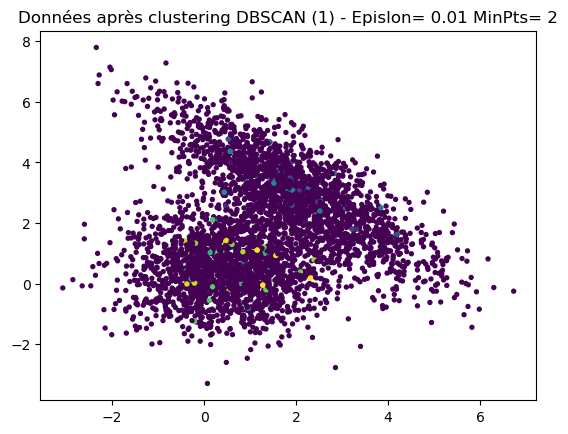

In [30]:
name = "engytime.arff"
datanp = get_data(path, name)
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1]

print("------------------------------------------------------")
print("Appel DBSCAN (1) ... ")
tps1 = time.time()
epsilon=0.01
min_pts= 2
model = cluster.DBSCAN(eps=epsilon, min_samples=min_pts)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon)+" MinPts= "+str(min_pts))
plt.show()

# 2. HDBSCAN

------------------------------------------------------
Appel HDBSCAN (1) ... 
Number of clusters: 6
Number of noise points: 47


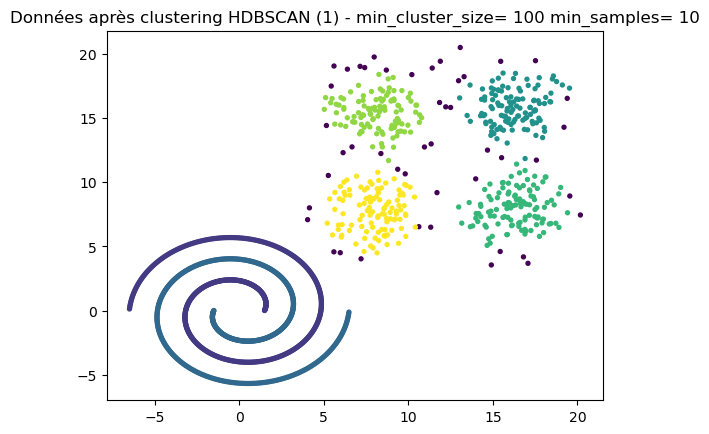

In [31]:
name = "spiralsquare.arff"
datanp = get_data(path, name)
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1]

print("------------------------------------------------------")
print("Appel HDBSCAN (1) ... ")
tps1 = time.time()
model = cluster.HDBSCAN(min_cluster_size=100, min_samples=10)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering HDBSCAN (1) - min_cluster_size= "+str(100)+" min_samples= "+str(10))
plt.show()


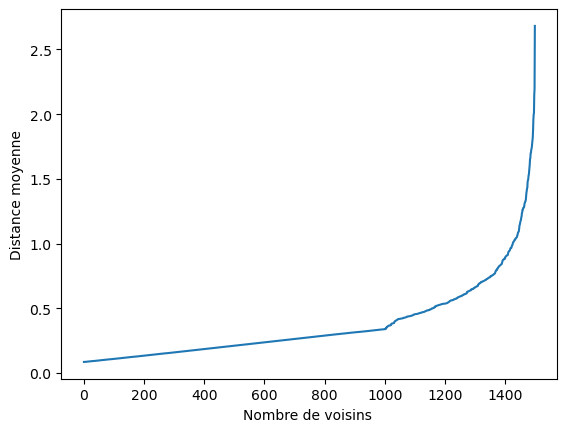

------------------------------------------------------
Appel DBSCAN (1) ... 
Number of clusters: 7
Number of noise points: 66


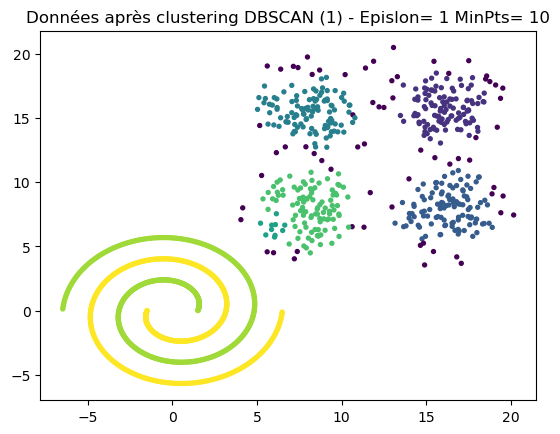

In [32]:
name = "spiralsquare.arff"
datanp = get_data(path, name)
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1]

# Distances aux k plus proches voisins
datanp = get_data(path,name)
k=10
neigh = NearestNeighbors( n_neighbors = k )
neigh.fit( datanp )
distances , indices = neigh.kneighbors( datanp )
# distance moyenne sur les k plus proches voisins
# en retirant le point " origine "
newDistances = np.asarray([np.average( distances[i][1:]) for i in range (0 ,distances.shape[0])])
# trier par ordre croissant
distancetrie = np.sort( newDistances )
plt.xlabel('Nombre de voisins ')
plt.ylabel('Distance moyenne')
plt.plot( distancetrie ) ;
plt.show()

print("------------------------------------------------------")
print("Appel DBSCAN (1) ... ")
tps1 = time.time()
epsilon=1
min_pts= 10
model = cluster.DBSCAN(eps=epsilon, min_samples=min_pts)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering DBSCAN (1) - Epislon= "+str(epsilon)+" MinPts= "+str(min_pts))
plt.show()


### Limite de HDBSCAN

------------------------------------------------------
Appel HDBSCAN (1) ... 
Number of clusters: 2
Number of noise points: 1771


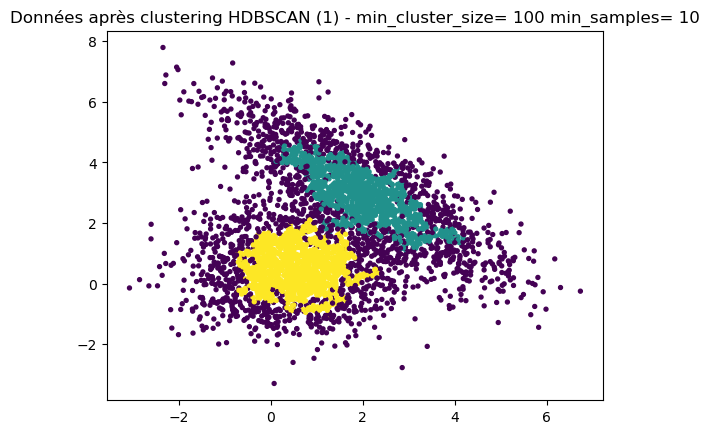

In [33]:
name = "engytime.arff"
datanp = get_data(path, name)
f0 = datanp[:,0] # tous les élements de la première colonne
f1 = datanp[:,1]

print("------------------------------------------------------")
print("Appel HDBSCAN (1) ... ")
tps1 = time.time()
model = cluster.HDBSCAN(min_cluster_size=100, min_samples=10)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print('Number of clusters: %d' % n_clusters)
print('Number of noise points: %d' % n_noise)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering HDBSCAN (1) - min_cluster_size= "+str(100)+" min_samples= "+str(10))
plt.show()
